In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [22]:
os.getcwd()

'/content'

In [0]:
data = pd.read_csv('./min10_data.csv' ,index_col=0, header=0, parse_dates=[0])

In [24]:
data.head()

,Open,High,Low,Close,Volume,RVol,JumpRatio,EqtAllEvents,10MinReturn
2016-01-04 17:20:00,2011.50,2012.00,2011.25,2011.25,1077.0,0.213197,0.024597,0.0,-0.000124
2016-01-04 17:30:00,2011.25,2012.75,2011.25,2011.50,1362.0,0.213389,0.024751,0.0,0.000124
2016-01-04 17:40:00,2011.75,2012.00,2011.25,2011.50,526.0,0.213347,0.025063,0.0,0.000000
2016-01-04 17:50:00,2011.25,2011.75,2011.00,2011.25,620.0,0.213295,0.025495,0.0,-0.000124
2016-01-04 18:00:00,2011.25,2012.50,2011.25,2012.50,846.0,0.213269,0.025070,0.0,0.000621


In [0]:
df = data['RVol']

In [0]:
df = df.reset_index()
df.rename(columns = {"index":"ds","RVol":"y"},inplace = True)

In [27]:
df.head()

,ds,y
0,2016-01-04 17:20:00,0.213197
1,2016-01-04 17:30:00,0.213389
2,2016-01-04 17:40:00,0.213347
3,2016-01-04 17:50:00,0.213295
4,2016-01-04 18:00:00,0.213269


In [70]:
type(df.iloc[0,0])

pandas._libs.tslib.Timestamp

In [0]:
model = Prophet(changepoint_prior_scale=0.01).fit(df)

In [0]:
future = model.make_future_dataframe( periods = 300, freq = 'H')

In [0]:
fcst = model.predict(future)

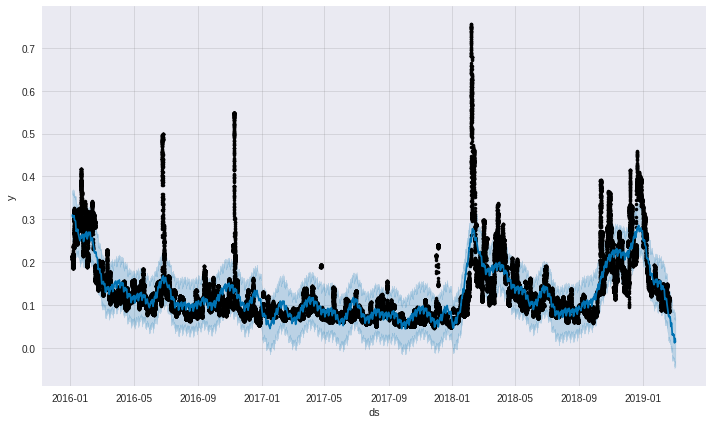

In [74]:
fig1 = model.plot(fcst)
fig1.show()

In [75]:
df.head()

,ds,y
0,2016-01-04 17:20:00,0.213197
1,2016-01-04 17:30:00,0.213389
2,2016-01-04 17:40:00,0.213347
3,2016-01-04 17:50:00,0.213295
4,2016-01-04 18:00:00,0.213269


In [76]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-04 17:20:00,0.310158,0.251022,0.369104
1,2016-01-04 17:30:00,0.309977,0.253453,0.364790
2,2016-01-04 17:40:00,0.309802,0.252139,0.363999
3,2016-01-04 17:50:00,0.309634,0.252883,0.363542
4,2016-01-04 18:00:00,0.309475,0.256531,0.362659


In [0]:
output =fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(df, left_on = 'ds',right_on = 'ds')

In [103]:
output = output.set_index(['ds'])
output.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-04 17:20:00,0.310158,0.251022,0.369104,0.213197
2016-01-04 17:30:00,0.309977,0.253453,0.364790,0.213389
2016-01-04 17:40:00,0.309802,0.252139,0.363999,0.213347
2016-01-04 17:50:00,0.309634,0.252883,0.363542,0.213295
2016-01-04 18:00:00,0.309475,0.256531,0.362659,0.213269


In [104]:
output = output.resample('30min').mean()
output.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-04 17:00:00,0.310158,0.251022,0.369104,0.213197
2016-01-04 17:30:00,0.309804,0.252825,0.364110,0.213344
2016-01-04 18:00:00,0.309326,0.255599,0.364623,0.213253
2016-01-04 18:30:00,0.308924,0.254672,0.364501,0.213260
2016-01-04 19:00:00,0.308595,0.254667,0.363445,0.213732


In [0]:
mask = (output['yhat_upper'] <output['y'])| (output['y']<output['yhat_lower'])

In [106]:
output['label'] = mask
counter = list(output['label']).count(True)
print(f'the percentage of detected market events by prophet model is {counter/output.shape[0]} ')

the percentage of detected market events by prophet model is 0.07342880598376357 


,yhat,yhat_lower,yhat_upper,y,label
ds,,,,,
2016-01-04 17:00:00,0.310158,0.251022,0.369104,0.213197,True
2016-01-04 17:30:00,0.309804,0.252825,0.364110,0.213344,True
2016-01-04 18:00:00,0.309326,0.255599,0.364623,0.213253,True
2016-01-04 18:30:00,0.308924,0.254672,0.364501,0.213260,True
2016-01-04 19:00:00,0.308595,0.254667,0.363445,0.213732,True


In [0]:
output['label'].to_csv('label_prophet.csv')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


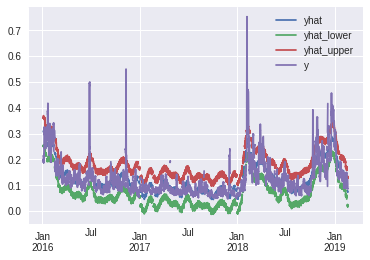

In [115]:
output.plot(x=output.index.values,y = ['yhat', 'yhat_lower', 'yhat_upper','y'], kind = 'line')


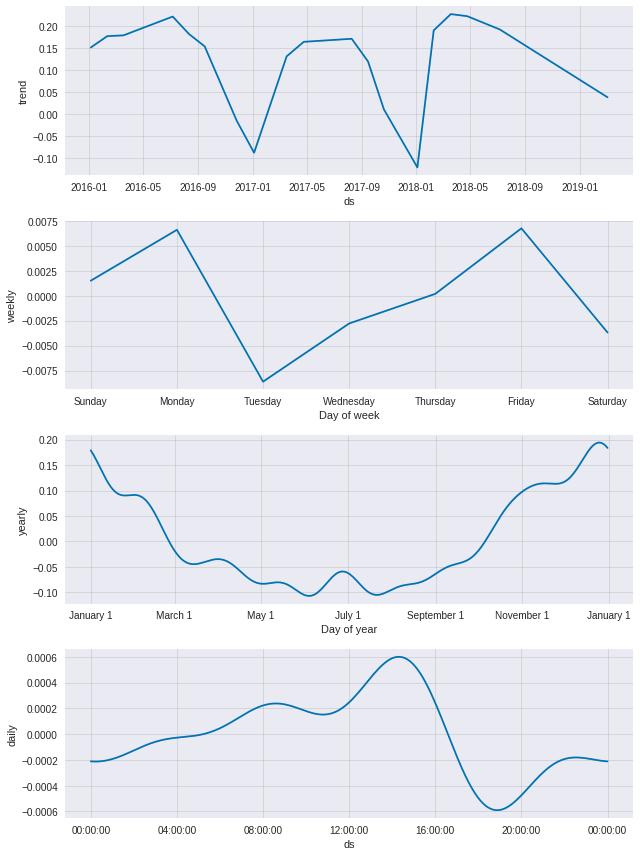

In [116]:
fig2 = model.plot_components(fcst)
fig2.show()